<p align="center">
    <img src="logo.png" alt="logo.png">
</p>


# TESTE A/B

O objetivo desse notebook foi fazer um Teste A/B para comparar duas versões da interface do aplicativo Praceando — V1 e V2 — para avaliar a eficácia das mudanças implementadas na experiência do usuário. Com base nos resultados, buscamos entender qual versão proporciona uma melhor usabilidade, otimizando assim a interação dos usuários com o aplicativo e aumentando seu engajamento .

Metodologia Utilizada
Para obter as informações necessárias, desenvolvemos um formulário para coletar dados dos usuários sobre suas percepções e experiências com ambas as versões da interface. A base de dados foi composta por 30 respostas, sendo 15 para a V1 e 15 para a V2, garantindo uma análise equilibrada das duas versões.

Cálculo do Teste T
Dado que a amostra era pequena (30 linhas), optamos pelo uso do Teste T, uma técnica estatística amplamente utilizada para comparar as médias de dois grupos e determinar se as diferenças observadas são estatisticamente significativas. O Teste T é particularmente adequado quando se deseja avaliar se há uma diferença real entre duas versões de uma variável, mesmo em situações em que o tamanho da amostra é limitado.


## Importações

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos Dados

In [30]:
df = pd.read_excel('testeAB.xlsx')

## Função para converter o tempo para segundos


In [31]:
def converter_segundos(time_str):
    #Converte uma string de tempo no formato 'H:M:S' ou 'M:S' para segundos.
    if pd.isna(time_str):
        return np.nan
    h, m, s = 0, 0, 0
    parts = time_str.split(':')
    if len(parts) == 3:  # formato H:M:S
        h, m, s = map(int, parts)
    elif len(parts) == 2:  # formato M:S
        m, s = map(int, parts)
    return h * 3600 + m * 60 + s


## Converter o tempo para segundos para a tela "Home"


In [32]:

df['Tempo_Home_Segundos'] = df['Tempo que o usuário demorou (Home)'].apply(converter_segundos)


## Separar os grupos A e B


In [33]:
grupo_a = df[df['Qual tela está vendo'] == 'A (Oficial)']['Tempo_Home_Segundos'].dropna()
grupo_b = df[df['Qual tela está vendo'] == 'B (V1 Figma)']['Tempo_Home_Segundos'].dropna()


## Realizar o teste t-Student


In [34]:
t_stat, p_value = ttest_ind(grupo_a, grupo_b, equal_var=False)  # assumindo variâncias diferentes


## Exibir os resultados


In [35]:

print("Estatística t:", t_stat)
print("Valor p:", p_value)

Estatística t: 0.7333100674740843
Valor p: 0.4697731814732117


### Análise da Base

##### Histograma do tempo gasto na tela "Home" para os grupos A e B
O histograma mostra a frequência de tempos observados em cada grupo em intervalos de tempo específicos.
As barras de ambos os grupos se sobrepõem em muitos intervalos, indicando que os tempos dos grupos A e B são muito semelhantes na maioria dos casos. Isso também confirma visualmente que não há diferença significativa no tempo gasto pelos usuários de cada grupo na tela "Home".

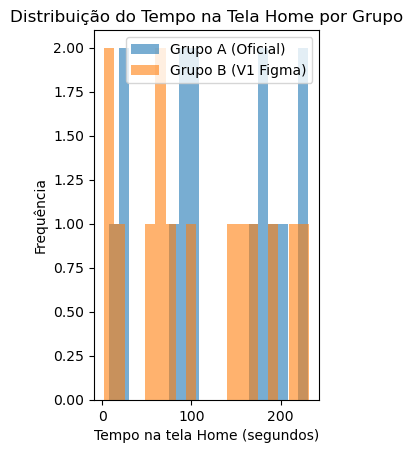

In [36]:
plt.subplot(1, 2, 1)
plt.hist(grupo_a, bins=20, alpha=0.6, label='Grupo A (Oficial)')
plt.hist(grupo_b, bins=20, alpha=0.6, label='Grupo B (V1 Figma)')
plt.xlabel('Tempo na tela Home (segundos)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo na Tela Home por Grupo')
plt.legend()
plt.show()

#### Boxplot para os tempos de cada grupo
O boxplot permite visualizar a dispersão dos tempos para os grupos A e B, destacando os quartis, a mediana (linha central) e os outliers (pontos fora do "bigode").
Ambas as distribuições parecem ter uma dispersão similar, e as medianas estão próximas, reforçando a ideia de que não há uma diferença clara entre os grupos. Esse gráfico ajuda a verificar a ausência de outliers que poderiam ter distorcido as médias ou variâncias dos grupos.

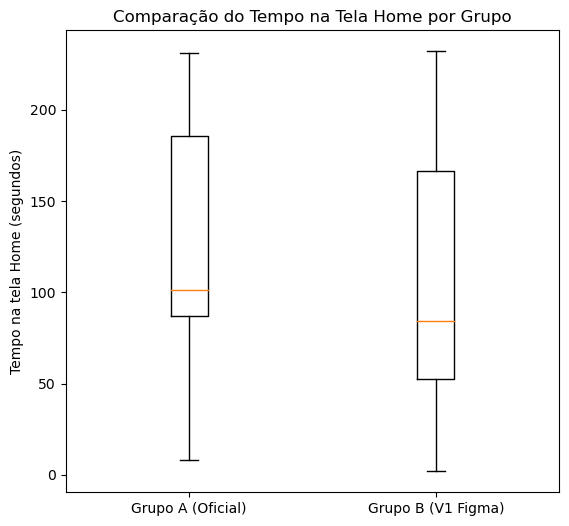

In [37]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.boxplot([grupo_a, grupo_b], labels=['Grupo A (Oficial)', 'Grupo B (V1 Figma)'])
plt.ylabel('Tempo na tela Home (segundos)')
plt.title('Comparação do Tempo na Tela Home por Grupo')
plt.show()

### Análise de Resultados

#### Gráfico de Densidade (KDE) para os tempos na tela "Home"
Este gráfico mostra a distribuição de densidade do tempo que os usuários levaram na tela "Home" para os grupos A (Oficial) e B (V1 Figma). A curva mais larga indica a faixa de tempo onde mais usuários passaram o tempo, enquanto as regiões onde as curvas são mais baixas representam valores menos frequentes.
A sobreposição significativa das curvas sugere que ambos os grupos possuem uma distribuição de tempo similar, reforçando que as diferenças entre os tempos médios provavelmente não são estatisticamente significativas.



C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_18160\25024916.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_a, shade=True, label='Grupo A (Oficial)')
c:\Users\fernandaleao-ieg\OneDrive - Instituto Germinare\UDEMY\Banco de dados\IA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_18160\25024916.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_b, shade=True, label='Grupo B (V1 Figma)')
c:\Users\fernandaleao-ieg\OneDrive - Instituto Germinare\UDEMY\Banco de dados\IA\Lib\site

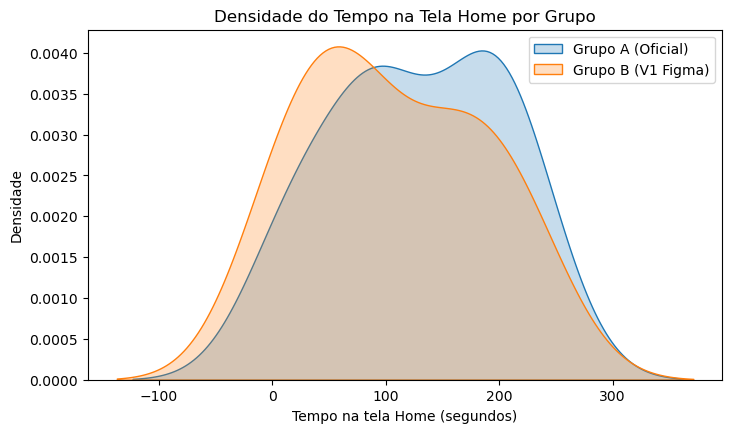

In [38]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.kdeplot(grupo_a, shade=True, label='Grupo A (Oficial)')
sns.kdeplot(grupo_b, shade=True, label='Grupo B (V1 Figma)')
plt.xlabel('Tempo na tela Home (segundos)')
plt.ylabel('Densidade')
plt.title('Densidade do Tempo na Tela Home por Grupo')
plt.legend()
plt.show()

#### Gráfico de Erro das Médias
Este gráfico ilustra as médias do tempo gasto na tela "Home" para cada grupo, com barras de erro representando o intervalo de confiança de 95%.
As médias para ambos os grupos estão próximas, e as barras de erro se sobrepõem, o que indica que a diferença média entre os grupos não é estatisticamente significativa. Isso significa que qualquer diferença observada entre os grupos A e B pode ser atribuída ao acaso.

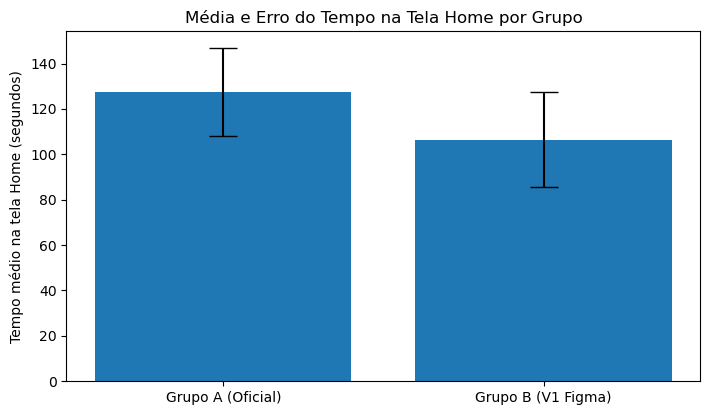

In [39]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 2)
means = [grupo_a.mean(), grupo_b.mean()]
std_errors = [grupo_a.std()/np.sqrt(len(grupo_a)), grupo_b.std()/np.sqrt(len(grupo_b))]
plt.bar(['Grupo A (Oficial)', 'Grupo B (V1 Figma)'], means, yerr=std_errors, capsize=10)
plt.ylabel('Tempo médio na tela Home (segundos)')
plt.title('Média e Erro do Tempo na Tela Home por Grupo')
plt.show()


### Gráfico de Diferença de Médias com intervalo de confiança
Este gráfico mostra a diferença entre as médias dos grupos A e B, com uma barra de erro indicando o intervalo de confiança de 95% para essa diferença.
Como o intervalo de confiança cruza a linha zero, isso indica que a diferença observada entre as médias dos grupos não é estatisticamente significativa, confirmando os resultados do teste t-Student. Em outras palavras, não há evidências de que um grupo levou consistentemente mais ou menos tempo do que o outro na tela "Home".

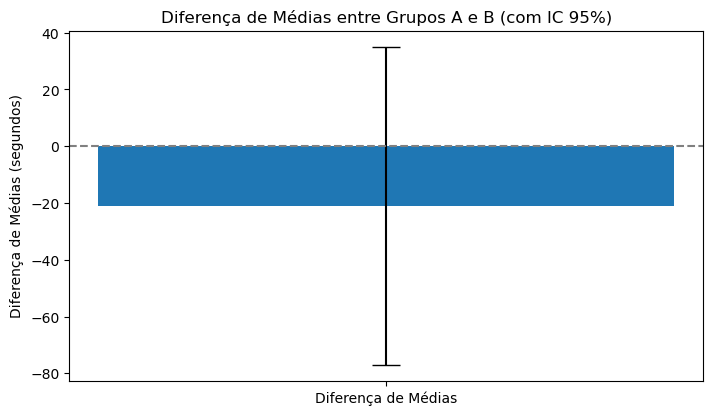

In [40]:
plt.figure(figsize=(18, 10))
mean_diff = np.mean(grupo_b) - np.mean(grupo_a)
std_combined = np.sqrt(grupo_a.var()/len(grupo_a) + grupo_b.var()/len(grupo_b))
conf_interval = 1.96 * std_combined  # 95% IC
plt.subplot(2, 2, 3)
plt.bar(['Diferença de Médias'], [mean_diff], yerr=[conf_interval], capsize=10)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Diferença de Médias (segundos)')
plt.title('Diferença de Médias entre Grupos A e B (com IC 95%)')
plt.show()



## Conclusão sobre valores

### 1. **Estatística t e Valor p**
   - **Estatística t**: O valor de t (0,733) representa a magnitude e direção da diferença entre os dois grupos (A e B) em relação ao tempo gasto na tela "Home". Um valor próximo de zero indica que a diferença entre as médias dos grupos é pequena.
   - **Valor p**: O valor p (0,470) representa a probabilidade de observarmos uma diferença tão grande (ou maior) entre os grupos A e B, assumindo que, na realidade, não haja diferença significativa entre eles.
     - Um valor p maior que o nível de significância comum (como 0,05) indica que não há evidências estatísticas para rejeitar a hipótese nula.
     - Com um valor p de 0,470, a análise sugere que a diferença entre os grupos A e B é insignificante estatisticamente, ou seja, a variação observada pode ser atribuída ao acaso.

### 2. **Interpretação da Hipótese Nula**
   - **Hipótese Nula (H₀)**: Em um teste t-Student, a hipótese nula geralmente afirma que não há diferença significativa entre as médias dos grupos comparados. 
   - **Resultado**: Com um valor p superior a 0,05, não temos evidências suficientes para rejeitar a hipótese nula. Logo, assumimos que o tempo médio gasto pelos usuários na tela "Home" não difere significativamente entre os grupos A e B.

### 3. **Conclusões Estatísticas**
   - **Média Similar Entre os Grupos**: A média de tempo para ambos os grupos é bastante semelhante, como visto tanto nos valores de t e p quanto nos gráficos. Isso indica que, com relação ao tempo gasto na tela "Home", a interface V1 (Figma) não apresentou melhoria ou piora em relação à interface oficial.
   - **Desempenho Equivalente**: Estatisticamente, os resultados indicam que ambos os grupos (interface oficial e nova interface) têm desempenho equivalente. Se o objetivo era avaliar se a nova interface trazia uma melhoria, esses resultados sugerem que, no quesito tempo, ela não trouxe benefícios adicionais significativos.

### 4. **Suporte Gráfico**
   - **Densidade e Boxplot**: Ambos os gráficos mostram distribuições e dispersão semelhantes entre os grupos, com as curvas KDE se sobrepondo e as medianas no boxplot estando próximas. Esses gráficos visualmente suportam o valor p alto e a conclusão de que as médias são semelhantes.
   - **Erro das Médias e Diferença de Médias**: As barras de erro e o intervalo de confiança para a diferença de médias mostram que a variação entre as médias dos grupos é baixa e dentro dos limites de erro. Isso significa que, em uma repetição do teste, é provável que os resultados sejam semelhantes, reforçando a insignificância da diferença.

### 5. **Recomendações Práticas**
   - **Foco em Outras Métricas**: Já que o tempo médio não variou de maneira significativa entre as interfaces, pode ser útil considerar outras métricas de usabilidade, como a facilidade de uso percebida, número de erros ou tarefas concluídas com sucesso.
   - **Potenciais Ajustes no Design**: Se o objetivo é otimizar a interface nova, talvez ajustes em outros elementos de interação (como feedback visual ou acessibilidade) possam resultar em uma experiência mais intuitiva, caso a eficiência temporal não seja um problema crítico.

### 6. **Resumo Final**
   - O teste A/B entre as interfaces A (Oficial) e B (V1 Figma) indica que ambas as versões são comparáveis em termos de tempo gasto na tela "Home". Com um valor p de 0,470 e uma estatística t baixa, concluímos que a nova interface não apresentou vantagens de desempenho significativo sobre a versão oficial.